In [84]:
#Loading libraries

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from utils.data_preprocess import cleantext #myownlib
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer


In [85]:
with open("text.txt",'r') as f:
    data=f.read()

In [86]:
df=data.split("\n")


In [87]:
df[1]

"That thereby beauty's rose might never die,"

In [88]:
len(df)

2159

In [89]:
#Tokenizing the data
tokenizer = Tokenizer(oov_token="<OOV>") 
tokenizer.fit_on_texts(df)  
word_index = tokenizer.word_index

In [90]:
print(word_index)

{'<OOV>': 1, 'and': 2, 'the': 3, 'to': 4, 'of': 5, 'my': 6, 'i': 7, 'in': 8, 'that': 9, 'thy': 10, 'thou': 11, 'with': 12, 'for': 13, 'is': 14, 'love': 15, 'not': 16, 'but': 17, 'a': 18, 'me': 19, 'thee': 20, 'so': 21, 'be': 22, 'as': 23, 'all': 24, 'you': 25, 'his': 26, 'which': 27, 'when': 28, 'it': 29, 'this': 30, 'by': 31, 'your': 32, 'doth': 33, 'do': 34, 'from': 35, 'on': 36, 'or': 37, 'no': 38, 'then': 39, 'have': 40, 'what': 41, 'are': 42, 'if': 43, 'more': 44, 'mine': 45, 'their': 46, 'shall': 47, 'sweet': 48, 'time': 49, 'will': 50, 'they': 51, 'beauty': 52, 'nor': 53, 'eyes': 54, 'art': 55, 'her': 56, 'heart': 57, 'yet': 58, 'o': 59, 'than': 60, 'can': 61, 'should': 62, 'thine': 63, 'now': 64, 'where': 65, 'make': 66, 'one': 67, 'hath': 68, 'he': 69, 'fair': 70, 'still': 71, 'how': 72, 'eye': 73, 'him': 74, 'like': 75, 'true': 76, 'see': 77, 'am': 78, 'she': 79, 'those': 80, 'though': 81, 'being': 82, 'some': 83, 'every': 84, 'such': 85, 'own': 86, 'were': 87, 'dost': 88, 'w

In [91]:
tokenizer.word_counts

OrderedDict([('from', 82),
             ('fairest', 5),
             ('creatures', 2),
             ('we', 15),
             ('desire', 11),
             ('increase', 4),
             ('that', 320),
             ('thereby', 2),
             ("beauty's", 18),
             ('rose', 6),
             ('might', 26),
             ('never', 16),
             ('die', 12),
             ('but', 164),
             ('as', 121),
             ('the', 444),
             ('riper', 2),
             ('should', 44),
             ('by', 92),
             ('time', 54),
             ('decease', 3),
             ('his', 107),
             ('tender', 7),
             ('heir', 3),
             ('bear', 12),
             ('memory', 8),
             ('thou', 234),
             ('contracted', 2),
             ('to', 415),
             ('thine', 44),
             ('own', 30),
             ('bright', 11),
             ('eyes', 51),
             ("feed'st", 1),
             ('thy', 267),
             ("light'st", 1)

In [92]:
total_words = len(tokenizer.word_index) + 1
print("The total no. of words in the data: ", total_words)

The total no. of words in the data:  3212


In [93]:
train_sequence= tokenizer.texts_to_sequences(df)

In [94]:
train_sequence[0:5]

[[35, 418, 878, 167, 214, 518],
 [9, 879, 135, 352, 103, 157, 200],
 [17, 23, 3, 880, 62, 31, 49, 635],
 [26, 312, 636, 103, 201, 26, 279],
 [17, 11, 881, 4, 63, 86, 215, 54]]

In [121]:
#FINDING OUT THE MAX SENTENCE

lis=[]
for i in train_sequence:
    lis.append(len(i))
max_len= max(lis)
print(f"The max length of the sentence in the given data\
       : {max_len}")

The max length of the sentence in the given data       : 11


The data is not in the normal, so we need to pad the sequences as the neural network takes the equal length of the sentences/documents.

In [122]:
pad_data=np.array(pad_sequences(train_sequence, maxlen=max_len,padding= "pre"))

In [123]:
pad_data

array([[   0,    0,    0, ...,  167,  214,  518],
       [   0,    0,    0, ...,  103,  157,  200],
       [   0,    0,    0, ...,   31,   49,  635],
       ...,
       [   0,  872,  138, ...,    9,    7,  189],
       [   0,    0,    0, ..., 3211,   16,   15],
       [   0,    0,    0, ...,    0,    0,    0]])

In [124]:
print(f"Before padding the length of the document: {len(train_sequence[0])}")
print(f"After padding the length of the document: {len(pad_data[0])}")

Before padding the length of the document: 6
After padding the length of the document: 11


In [125]:
for i in range(len(df)):
    print(f"SENTENCE:\t{df[i]:>{5}}\nTOKENIZE SENTENCE: {train_sequence[i]}")
    print()

SENTENCE:	FROM fairest creatures we desire increase,
TOKENIZE SENTENCE: [35, 418, 878, 167, 214, 518]

SENTENCE:	That thereby beauty's rose might never die,
TOKENIZE SENTENCE: [9, 879, 135, 352, 103, 157, 200]

SENTENCE:	But as the riper should by time decease,
TOKENIZE SENTENCE: [17, 23, 3, 880, 62, 31, 49, 635]

SENTENCE:	His tender heir might bear his memory:
TOKENIZE SENTENCE: [26, 312, 636, 103, 201, 26, 279]

SENTENCE:	But thou, contracted to thine own bright eyes,
TOKENIZE SENTENCE: [17, 11, 881, 4, 63, 86, 215, 54]

SENTENCE:	Feed'st thy light'st flame with self-substantial fuel,
TOKENIZE SENTENCE: [1373, 10, 1374, 637, 12, 123, 1375, 1376]

SENTENCE:	Making a famine where abundance lies,
TOKENIZE SENTENCE: [202, 18, 1377, 65, 519, 203]

SENTENCE:	Thyself thy foe, to thy sweet self too cruel.
TOKENIZE SENTENCE: [119, 10, 1378, 4, 10, 48, 123, 136, 280]

SENTENCE:	Thou that art now the world's fresh ornament
TOKENIZE SENTENCE: [11, 9, 55, 64, 3, 419, 313, 420]

SENTENCE:	And onl

TOKENIZE SENTENCE: [53, 179, 3, 1175, 5, 491, 1105]

SENTENCE:	When you have bid your servant once adieu;
TOKENIZE SENTENCE: [28, 25, 40, 2053, 32, 2054, 249, 2055]

SENTENCE:	Nor dare I question with my jealous thought
TOKENIZE SENTENCE: [53, 573, 7, 954, 12, 6, 2056, 140]

SENTENCE:	Where you may be, or your affairs suppose,
TOKENIZE SENTENCE: [65, 25, 93, 22, 37, 32, 1176, 2057]

SENTENCE:	But, like a sad slave, stay and think of nought
TOKENIZE SENTENCE: [17, 75, 18, 337, 407, 271, 2, 179, 5, 679]

SENTENCE:	Save, where you are how happy you make those.
TOKENIZE SENTENCE: [293, 65, 25, 42, 72, 220, 25, 66, 80]

SENTENCE:	So true a fool is love that in your will,
TOKENIZE SENTENCE: [21, 76, 18, 806, 14, 15, 9, 8, 32, 50]

SENTENCE:	Though you do any thing, he thinks no ill.
TOKENIZE SENTENCE: [81, 25, 34, 224, 210, 69, 1177, 38, 124]

SENTENCE:	That god forbid that made me first your slave,
TOKENIZE SENTENCE: [9, 807, 700, 9, 128, 19, 194, 32, 407]

SENTENCE:	I should in thought con

TOKENIZE SENTENCE: [5, 74, 94, 2, 20, 7, 78, 2965]

SENTENCE:	A torment thrice threefold thus to be cross'd.
TOKENIZE SENTENCE: [18, 1104, 805, 2966, 122, 4, 22, 2967]

SENTENCE:	Prison my heart in thy steel bosom's ward,
TOKENIZE SENTENCE: [2968, 6, 57, 8, 10, 822, 1022, 2969]

SENTENCE:	But then my friend's heart let my poor heart bail;
TOKENIZE SENTENCE: [17, 39, 6, 1071, 57, 105, 6, 178, 57, 1228]

SENTENCE:	Whoe'er keeps me, let my heart be his guard;
TOKENIZE SENTENCE: [2970, 452, 19, 105, 6, 57, 22, 26, 1150]

SENTENCE:	Thou canst not then use rigor in my gaol:
TOKENIZE SENTENCE: [11, 318, 16, 39, 187, 2971, 8, 6, 2972]

SENTENCE:	And yet thou wilt; for I, being pent in thee,
TOKENIZE SENTENCE: [2, 58, 11, 182, 13, 7, 82, 907, 8, 20]

SENTENCE:	Perforce am thine, and all that is in me.
TOKENIZE SENTENCE: [2973, 78, 63, 2, 24, 9, 14, 8, 19]

SENTENCE:	So, now I have confess'd that he is thine,
TOKENIZE SENTENCE: [21, 64, 7, 40, 2974, 9, 69, 14, 63]

SENTENCE:	And I myself am mort

### Building a RNN MODEL

In [140]:
vocab_size= total_words
embedding_layer= 100
seq_len=X.shape[1]

#create a model
model=Sequential()
model.add(Embedding(vocab_size,embedding_layer,input_length=seq_len)) # (YOur Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences=True)))  #(A Bidirectional LSTM layer)
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(vocab_size//2,activation="relu")) # (A Dense layer including regularizers)
model.add(Dense(vocab_size,activation="softmax")) #( A Dense Layer)
    
    # Pick an optimizer
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics= ['accuracy']) #(Pick a loss function)
print(model.summary())
        

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 10, 100)           321200    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_8 (Dense)              (None, 1606)              162206    
_________________________________________________________________
dense_9 (Dense)              (None, 3212)              5161684   
Total params: 6,106,690
Trainable params: 6,106,690
Non-trainable params: 0
____________________________________________

In [132]:
X=pad_data[:,:-1]
y=pad_data[:,-1]

In [133]:
y=to_categorical(y,num_classes=total_words )

In [134]:
X.shape

(2159, 10)

In [135]:
y.shape

(2159, 3212)

### Training the model

In [136]:
from pickle import dump, load

In [144]:
#fit model

learning_rate_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)
early_stopping= EarlyStopping(monitor='val_loss',min_delta=0, patience=2)
num_epochs = 50
history = model.fit(X,y,batch_size=128,epochs=num_epochs,
          validation_split=0.2,callbacks=[learning_rate_reduction,early_stopping])


Epoch 1/50
68/68 - 6s - loss: 1.2544 - accuracy: 0.6035
Epoch 2/50
68/68 - 5s - loss: 1.0041 - accuracy: 0.6846
Epoch 3/50
68/68 - 5s - loss: 0.9106 - accuracy: 0.7142
Epoch 4/50
68/68 - 5s - loss: 0.7231 - accuracy: 0.7791
Epoch 5/50
68/68 - 6s - loss: 0.5689 - accuracy: 0.8319
Epoch 6/50
68/68 - 5s - loss: 0.3958 - accuracy: 0.8888
Epoch 7/50
68/68 - 6s - loss: 0.2816 - accuracy: 0.9310
Epoch 8/50
68/68 - 6s - loss: 0.2192 - accuracy: 0.9481
Epoch 9/50
68/68 - 5s - loss: 0.1682 - accuracy: 0.9629
Epoch 10/50
68/68 - 5s - loss: 0.1212 - accuracy: 0.9759
Epoch 11/50
68/68 - 5s - loss: 0.0897 - accuracy: 0.9866
Epoch 12/50
68/68 - 5s - loss: 0.0651 - accuracy: 0.9898
Epoch 13/50
68/68 - 6s - loss: 0.0467 - accuracy: 0.9944
Epoch 14/50
68/68 - 6s - loss: 0.0378 - accuracy: 0.9944
Epoch 15/50
68/68 - 6s - loss: 0.0502 - accuracy: 0.9903
Epoch 16/50
68/68 - 6s - loss: 0.0903 - accuracy: 0.9810
Epoch 17/50
68/68 - 6s - loss: 0.1405 - accuracy: 0.9606
Epoch 18/50
68/68 - 7s - loss: 0.4860 - 

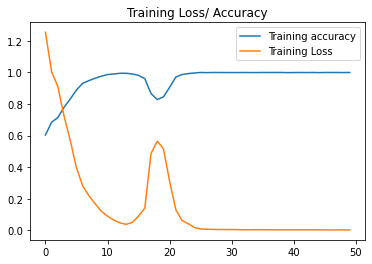

In [145]:
import matplotlib.pyplot as plt

acc=history.history['accuracy']
loss=history.history['loss']

epochs= range(len(acc))
plt.plot(epochs,acc,label="Training accuracy" )
plt.plot(epochs,loss,label="Training Loss")
plt.title("Training Loss/ Accuracy")
plt.legend()
plt.show()

In [146]:
model.save("praveen_model.h5")

In [148]:
import warnings
warnings.filterwarnings("ignore")
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for i in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list= pad_sequences([token_list], maxlen=max_len,padding= "pre",truncating='pre')
    predicted= model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index==predicted:
            output_word = word
            break
    seed_text +=" "+output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope live new new lies thee thee thee ' ' now still thee you mind write life me me bright eyes still eyes spent tongue bright bright hate bright you you you erred sweets sit story acquainted controlling another men sing more store give story still ' mind ' truth forth mend story story none thee time remember'd light youth youth pride weeds weeds weeds stell'd cover anticipate amiss one one child sake debt hence sense cry wide wide cruel cruel clear blot blot tears tears blot chest strong sought date strong long date date brood brood brood blot blot lays
